In [66]:
import pandas as pd
import numpy as np

df = pd.read_csv('world-data-2023.csv')

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
df.head()

Country Density\n(P/Km2) Abbreviation Agricultural Land( %)  \
0  Afghanistan               60           AF                58.10%   
1      Albania              105           AL                43.10%   
2      Algeria               18           DZ                17.40%   
3      Andorra              164           AD                40.00%   
4       Angola               26           AO                47.50%   

  Land Area(Km2) Armed Forces size  Birth Rate  Calling Code  \
0        652,230           323,000       32.49          93.0   
1         28,748             9,000       11.78         355.0   
2      2,381,741           317,000       24.28         213.0   
3            468               NaN        7.20         376.0   
4      1,246,700           117,000       40.73         244.0   

  Capital/Major City Co2-Emissions  ... Out of pocket health expenditure  \
0              Kabul         8,672  ...                           78.40%   
1             Tirana         4,536  ...                           56.90%   
2            Algiers       150,006  ...                           28.10%   
3   Andorra la Vella           469  ...                           36.40%   
4             Luanda        34,693  ...                           33.40%   

  Physicians per thousand  Population  \
0                    0.28  38,041,754   
1                    1.20   2,854,191   
2                    1.72  43,053,054   
3                    3.33      77,142   
4                    0.21  31,825,295   

   Population: Labor force participation (%) Tax revenue (%) Total tax rate  \
0                                     48.90%           9.30%         71.40%   
1                                     55.70%          18.60%         36.60%   
2                                     41.20%          37.20%         66.10%   
3                                        NaN             NaN            NaN   
4                                     77.50%           9.20%         49.10%   

  Unemployment rate Urban_population   Latitude  Longitude  
0            11.12%        9,797,273  33.939110  67.709953  
1            12.33%        1,747,593  41.153332  20.168331  
2            11.70%       31,510,100  28.033886   1.659626  
3               NaN           67,873  42.506285   1.521801  
4             6.89%       21,061,025 -11.202692  17.873887  

[5 rows x 35 columns]

In [69]:
df.shape

(195, 35)

In [70]:
# Check for missing values
print(df.isnull().sum())

Country                                       0
Density\n(P/Km2)                              0
Abbreviation                                  7
Agricultural Land( %)                         7
Land Area(Km2)                                1
Armed Forces size                            24
Birth Rate                                    6
Calling Code                                  1
Capital/Major City                            3
Co2-Emissions                                 7
CPI                                          17
CPI Change (%)                               16
Currency-Code                                15
Fertility Rate                                7
Forested Area (%)                             7
Gasoline Price                               20
GDP                                           2
Gross primary education enrollment (%)        7
Gross tertiary education enrollment (%)      12
Infant mortality                              6
Largest city                            

In [71]:
columns = ['Land Area(Km2)','Density\n(P/Km2)', 'Agricultural Land( %)','Armed Forces size', 'Population', 'Urban_population', 'Co2-Emissions', 'CPI Change (%)', 'Forested Area (%)', 'Gasoline Price','GDP', 'Gross primary education enrollment (%)','Gross tertiary education enrollment (%)','Minimum wage','Total tax rate', 'Unemployment rate', 'Out of pocket health expenditure','Population: Labor force participation (%)']

In [72]:
for col in columns:
    df[col] = df[col].str.replace(',', '')
    df[col] = df[col].str.replace('$', '')
    df[col] = df[col].str.replace('%', '')


In [73]:
for col in columns:
    df[col] = pd.to_numeric(df[col])


In [74]:
df.dtypes

Country                                       object
Density\n(P/Km2)                               int64
Abbreviation                                  object
Agricultural Land( %)                        float64
Land Area(Km2)                               float64
Armed Forces size                            float64
Birth Rate                                   float64
Calling Code                                 float64
Capital/Major City                            object
Co2-Emissions                                float64
CPI                                           object
CPI Change (%)                               float64
Currency-Code                                 object
Fertility Rate                               float64
Forested Area (%)                            float64
Gasoline Price                               float64
GDP                                          float64
Gross primary education enrollment (%)       float64
Gross tertiary education enrollment (%)      f

In [75]:
df.drop(columns=['Latitude', 'Longitude', 'Calling Code'], inplace=True)

In [76]:
median = df['Population: Labor force participation (%)'].median()

df['Population: Labor force participation (%)'].fillna(median, inplace=True)

In [77]:
print(df['Population: Labor force participation (%)'].isnull().sum())

0


In [78]:
median = df['Unemployment rate'].median()

df['Unemployment rate'].fillna(median, inplace=True)

In [79]:
print(df['Unemployment rate'].isnull().sum())

0


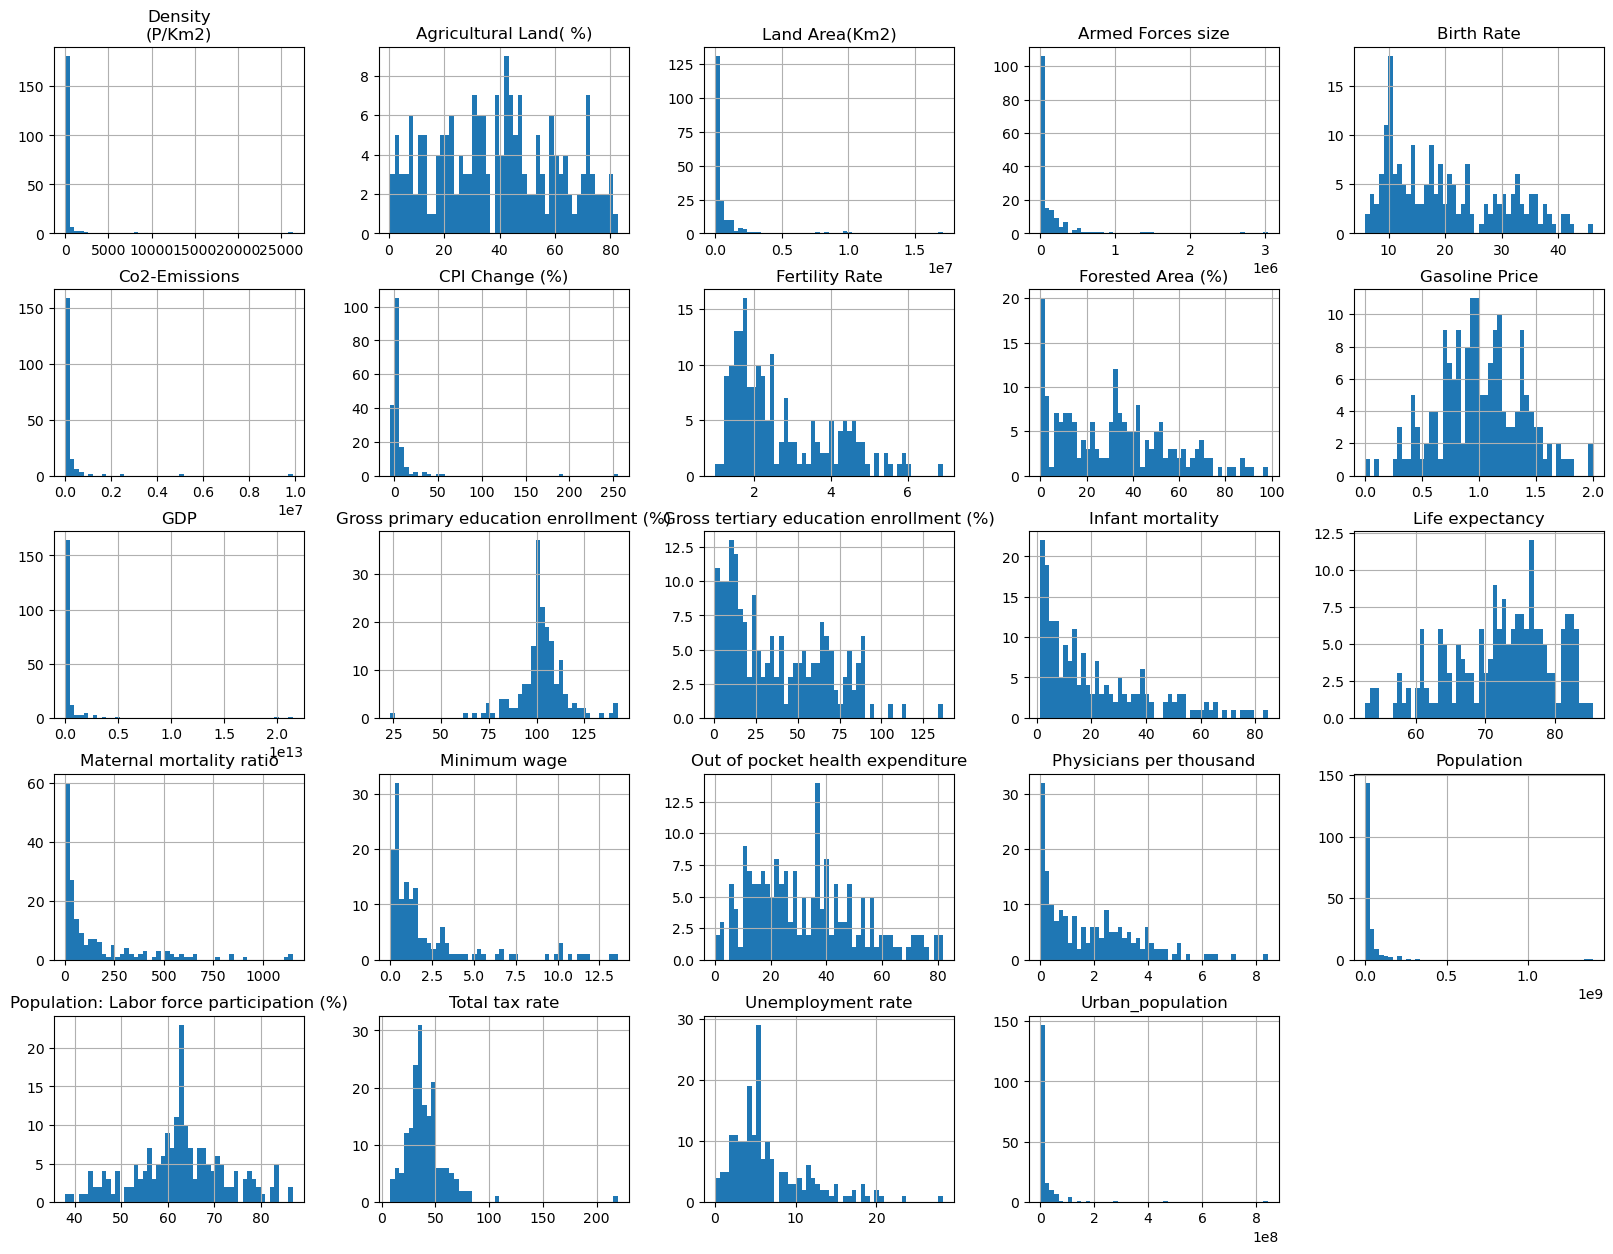

C:\Users\1508\AppData\Local\anaconda30\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\1508\AppData\Local\anaconda30\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\1508\AppData\Local\anaconda30\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\1508\AppData\Local\anaconda30\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

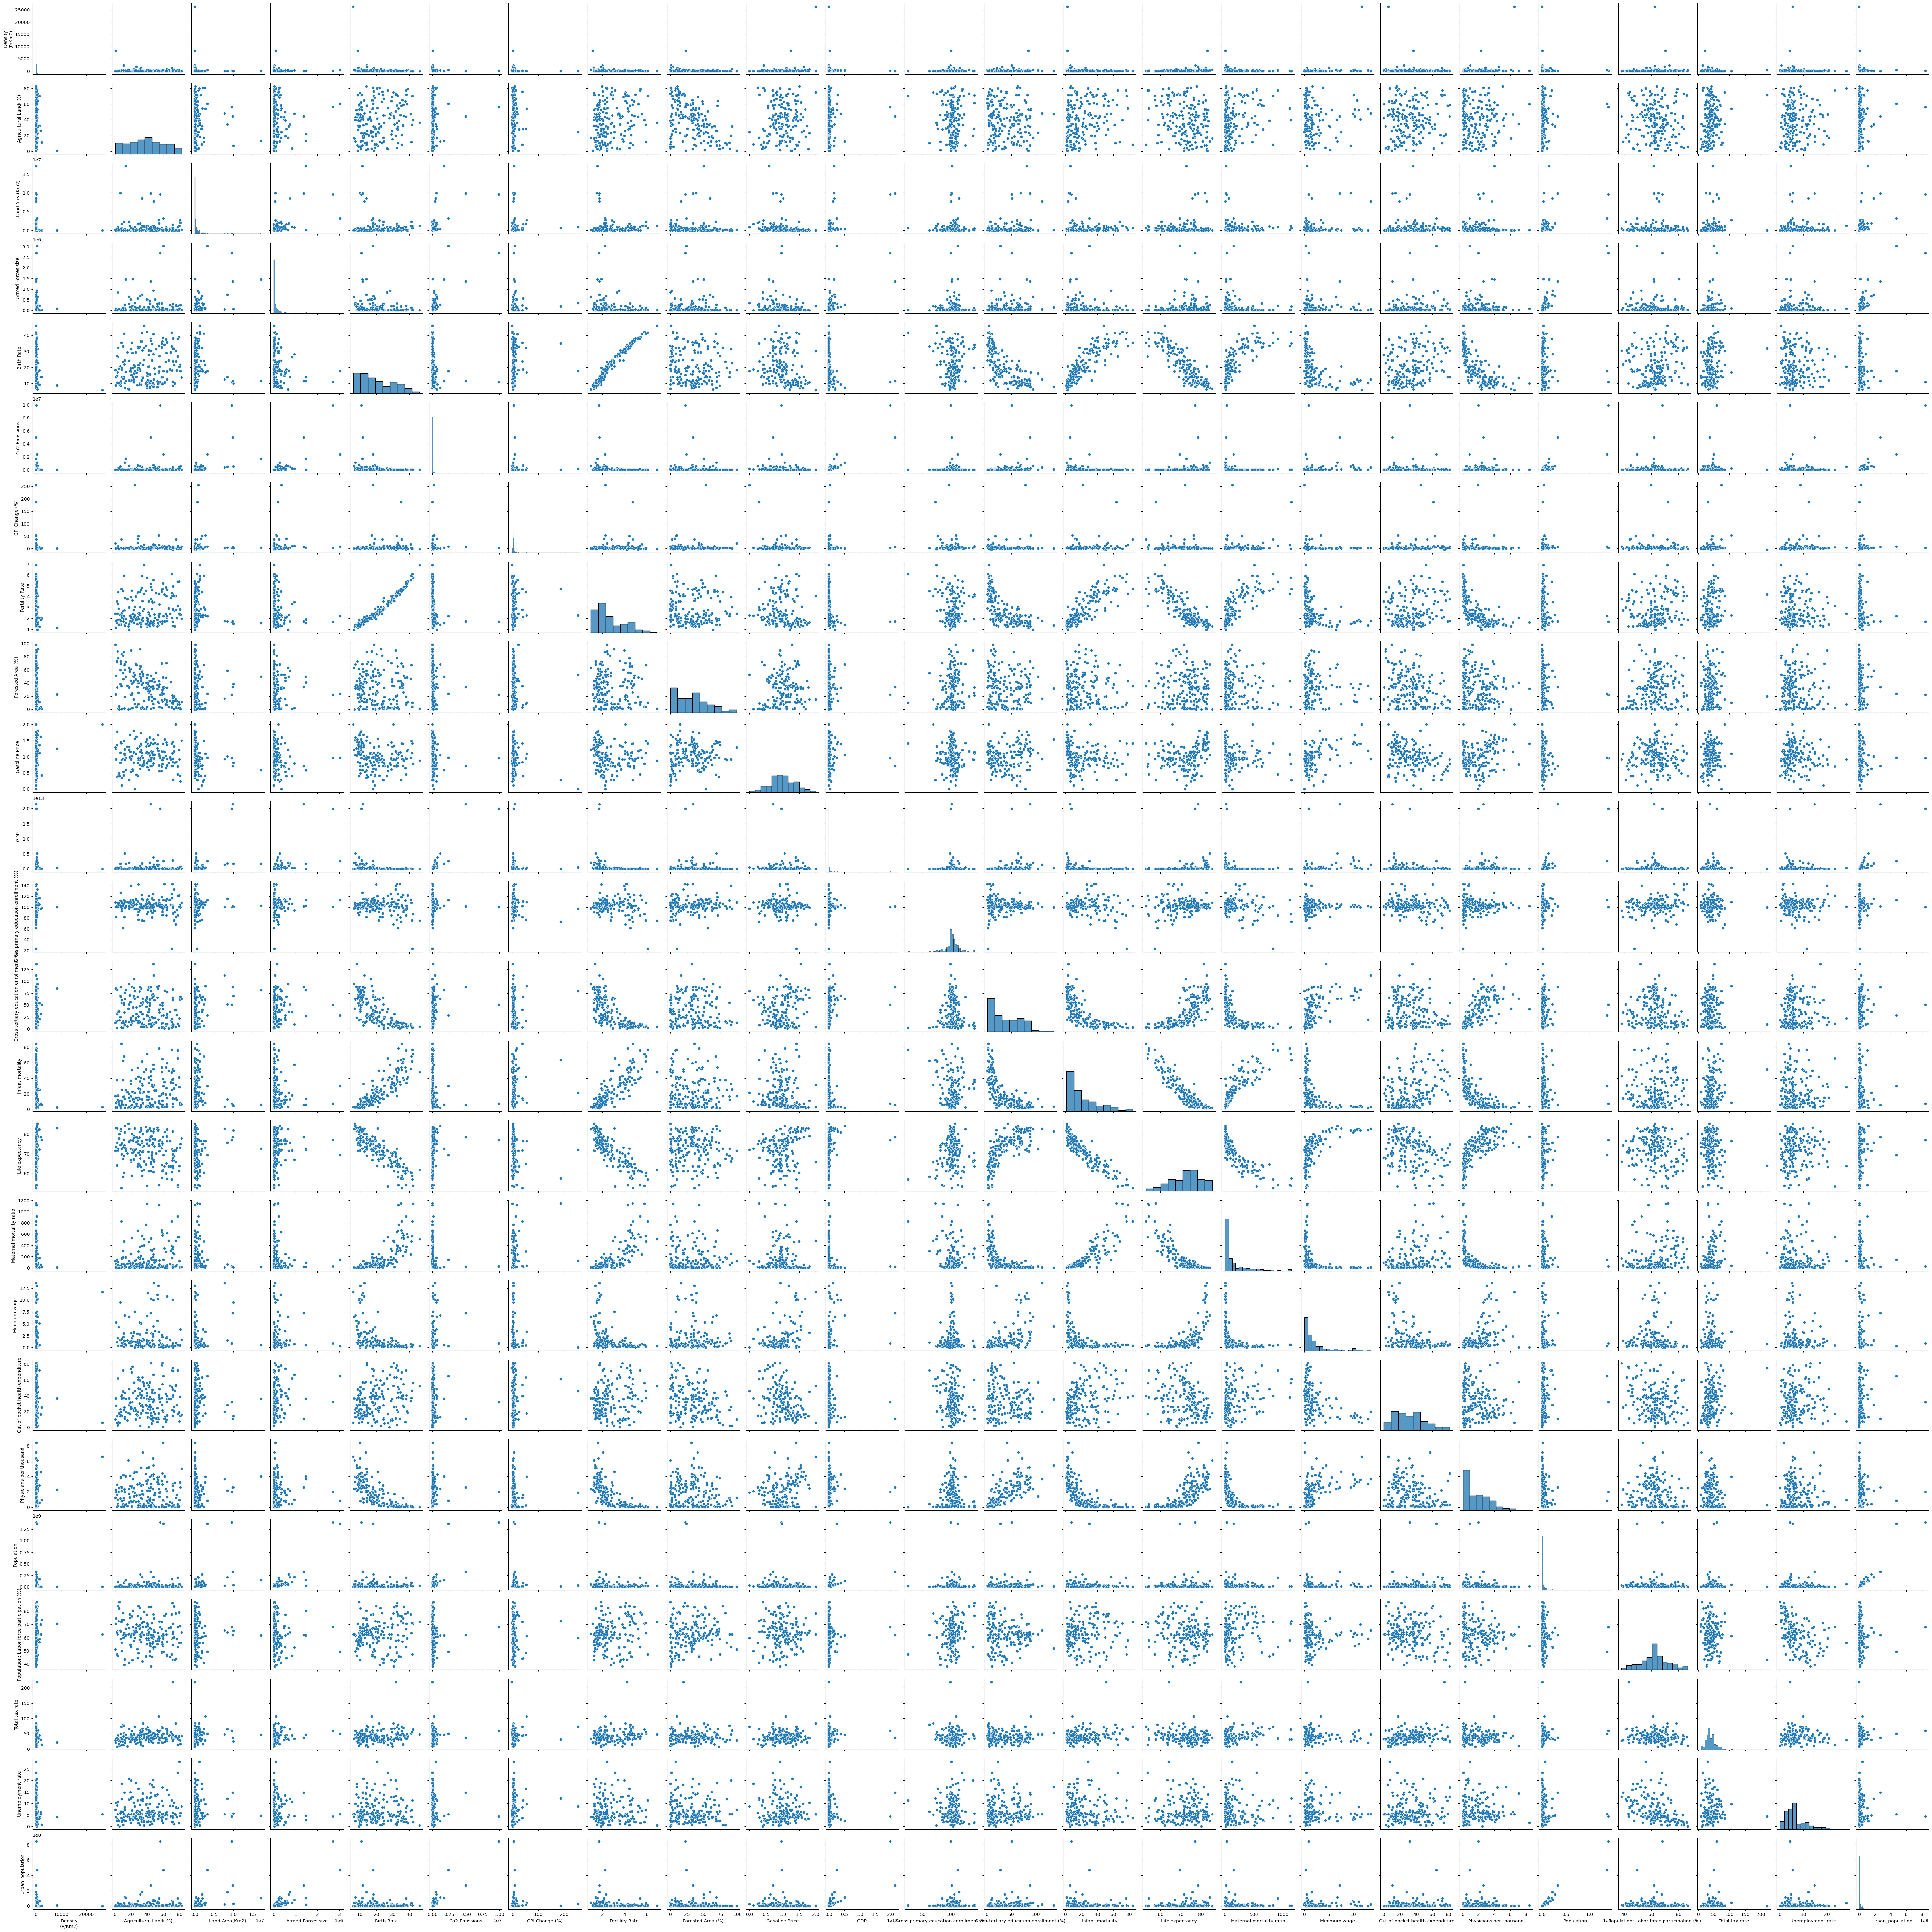

'\n# Correlation matrix\ncorr_matrix = df.corr()\nsns.heatmap(corr_matrix, annot=True)\nplt.show()\n'

In [15]:
# Histogram
df.hist(bins=50, figsize=(20,15))
plt.show()

# Scatter plot
sns.pairplot(df)
plt.show()


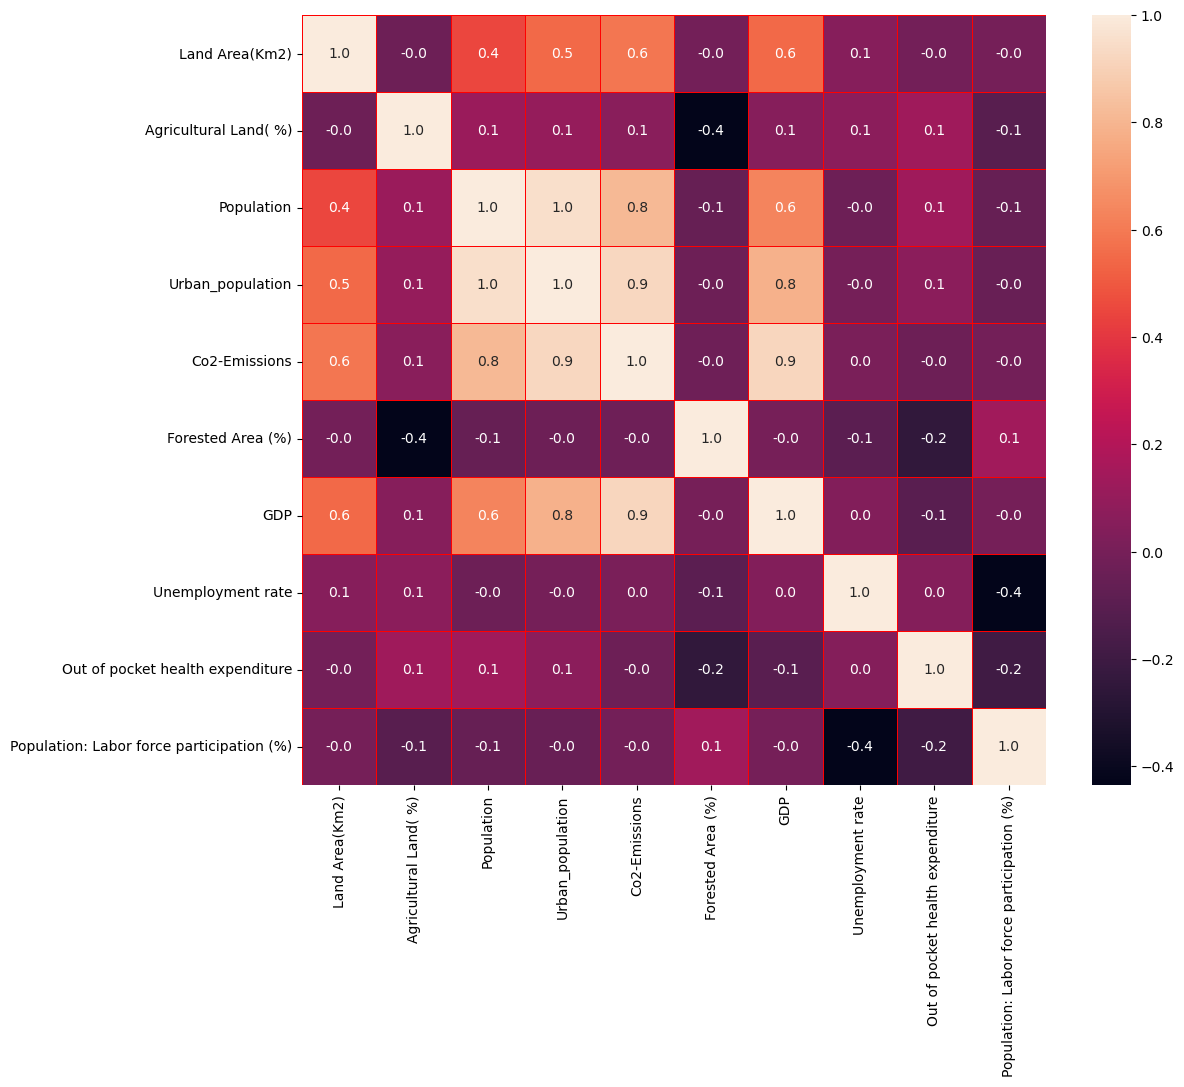

In [16]:
f, ax = plt.subplots(figsize = (12,10))
sns.heatmap(df.loc[:, ['Land Area(Km2)','Agricultural Land( %)', 'Population', 
                       'Urban_population', 'Co2-Emissions', 'Forested Area (%)','GDP', 
                       
                       'Unemployment rate', 'Out of pocket health expenditure','Population: Labor force participation (%)']].corr(),
            annot = True,
            linecolor = 'r',
            linewidths = .5,
            fmt = '.1f',
            ax = ax);
plt.show()

# Descriptive Statistics

In [17]:
# Descriptive statistics
df.describe()

Density\n(P/Km2)  Agricultural Land( %)  Land Area(Km2)  \
count        195.000000             188.000000    1.940000e+02   
mean         356.764103              39.117553    6.896244e+05   
std         1982.888967              21.783052    1.921609e+06   
min            2.000000               0.600000    0.000000e+00   
25%           35.500000              21.700000    2.382825e+04   
50%           89.000000              39.600000    1.195110e+05   
75%          216.500000              55.375000    5.242560e+05   
max        26337.000000              82.600000    1.709824e+07   

       Armed Forces size  Birth Rate  Co2-Emissions  CPI Change (%)  \
count       1.710000e+02  189.000000   1.880000e+02      179.000000   
mean        1.592749e+05   20.214974   1.777992e+05        6.722346   
std         3.806288e+05    9.945774   8.387903e+05       24.450414   
min         0.000000e+00    5.900000   1.100000e+01       -4.300000   
25%         1.100000e+04   11.300000   2.304250e+03        1.000000   
50%         3.100000e+04   17.950000   1.230300e+04        2.300000   
75%         1.420000e+05   28.750000   6.388425e+04        4.250000   
max         3.031000e+06   46.080000   9.893038e+06      254.900000   

       Fertility Rate  Forested Area (%)  Gasoline Price  ...  \
count      188.000000         188.000000      175.000000  ...   
mean         2.698138          32.015426        1.002457  ...   
std          1.282267          23.791331        0.368858  ...   
min          0.980000           0.000000        0.000000  ...   
25%          1.705000          11.000000        0.755000  ...   
50%          2.245000          32.000000        0.980000  ...   
75%          3.597500          48.175000        1.240000  ...   
max          6.910000          98.300000        2.000000  ...   

       Life expectancy  Maternal mortality ratio  Minimum wage  \
count       187.000000                181.000000    150.000000   
mean         72.279679                160.392265      2.194133   
std           7.483661                233.502024      2.970796   
min          52.800000                  2.000000      0.010000   
25%          67.000000                 13.000000      0.402500   
50%          73.200000                 53.000000      1.045000   
75%          77.500000                186.000000      2.447500   
max          85.400000               1150.000000     13.590000   

       Out of pocket health expenditure  Physicians per thousand  \
count                        188.000000               188.000000   
mean                          32.637234                 1.839840   
std                           19.172697                 1.684261   
min                            0.200000                 0.010000   
25%                           17.450000                 0.332500   
50%                           30.700000                 1.460000   
75%                           43.975000                 2.935000   
max                           81.600000                 8.420000   

         Population  Population: Labor force participation (%)  \
count  1.940000e+02                                 195.000000   
mean   3.938116e+07                                  62.710000   
std    1.450924e+08                                   9.975707   
min    8.360000e+02                                  38.000000   
25%    1.962678e+06                                  57.250000   
50%    8.826588e+06                                  62.450000   
75%    2.858549e+07                                  68.300000   
max    1.397715e+09                                  86.800000   

       Total tax rate  Unemployment rate  Urban_population  
count      183.000000         195.000000      1.900000e+02  
mean        40.822404           6.737641      2.230454e+07  
std         20.557662           4.845382      7.543050e+07  
min          8.000000           0.090000      5.464000e+03  
25%         30.600000           3.590000      1.152961e+06  
50%         37.20

In [20]:
# Skewness and kurtosis
df.loc[:, ['Land Area(Km2)','Agricultural Land( %)', 'Population', 
                       'Urban_population', 'Co2-Emissions', 'Forested Area (%)','GDP', 
                       
                       'Unemployment rate', 'Out of pocket health expenditure','Population: Labor force participation (%)']].skew()

Land Area(Km2)                               5.569313
Agricultural Land( %)                        0.090844
Population                                   8.390096
Urban_population                             8.306802
Co2-Emissions                                9.573513
Forested Area (%)                            0.518495
GDP                                          8.578927
Unemployment rate                            1.498312
Out of pocket health expenditure             0.567070
Population: Labor force participation (%)   -0.007423
dtype: float64

In [21]:
df.loc[:, ['Land Area(Km2)','Agricultural Land( %)', 'Population', 
                       'Urban_population', 'Co2-Emissions', 'Forested Area (%)','GDP','Unemployment rate', 'Out of pocket health expenditure','Population: Labor force participation (%)']].kurtosis()

Land Area(Km2)                                35.995016
Agricultural Land( %)                         -0.947000
Population                                    75.571246
Urban_population                              81.149152
Co2-Emissions                                102.748248
Forested Area (%)                             -0.451377
GDP                                           78.039315
Unemployment rate                              2.490526
Out of pocket health expenditure              -0.323330
Population: Labor force participation (%)     -0.014539
dtype: float64

## Distributions

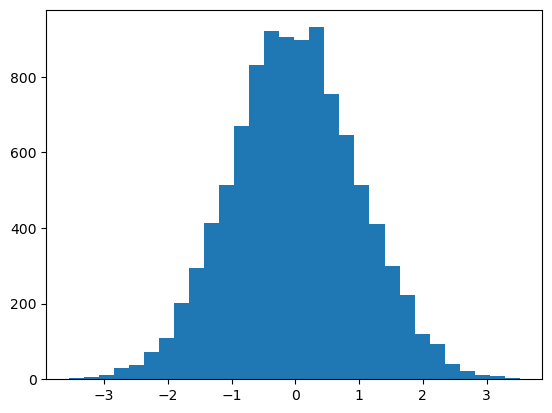

In [22]:
#Normal distribution

import matplotlib.pyplot as plt

data = np.random.normal(loc=0.0, scale=1.0, size=10000)
plt.hist(data, bins=30)
plt.show()


C:\Users\1508\AppData\Local\anaconda30\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


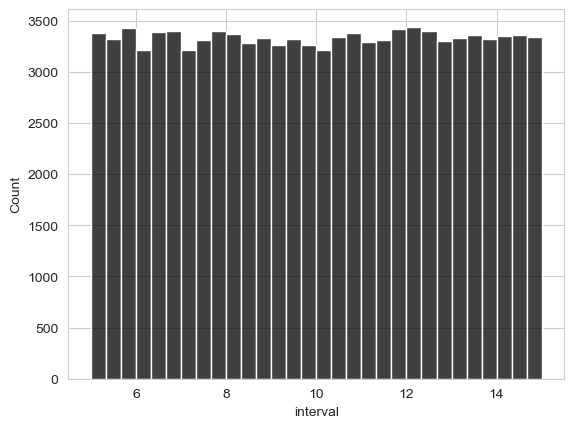

In [23]:
#Uniform distribution


# Importing required libraries
from scipy.stats import uniform
# Generating random variables from Uniform distribution
data = uniform.rvs(size = 100000, loc = 5, scale=10)

# Plotting the results
sns.set_style('whitegrid')
sns.histplot(data, bins = 30, color = 'k')
plt.xlabel('interval')
plt.show()


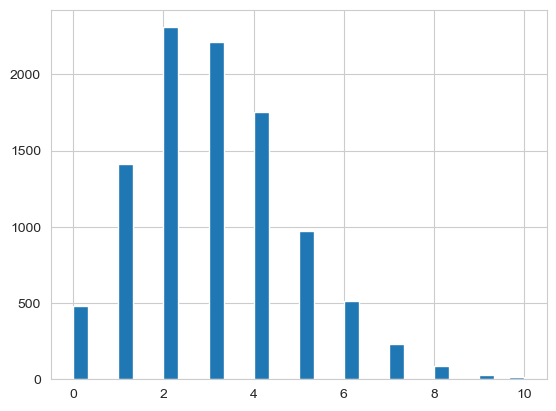

In [24]:
#Poisson distribution

from scipy.stats import poisson

data_poisson = poisson.rvs(mu=3, size=10000)
plt.hist(data_poisson, bins=30)
plt.show()


C:\Users\1508\AppData\Local\Temp\ipykernel_12912\3376377086.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data_expon, kde=True, bins=100, color='skyblue', hist_kws={"linewidth": 15,'alpha':1})
C:\Users\1508\AppData\Local\anaconda30\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[Text(0.5, 0, 'Exponential Distribution'), Text(0, 0.5, 'Frequency')]

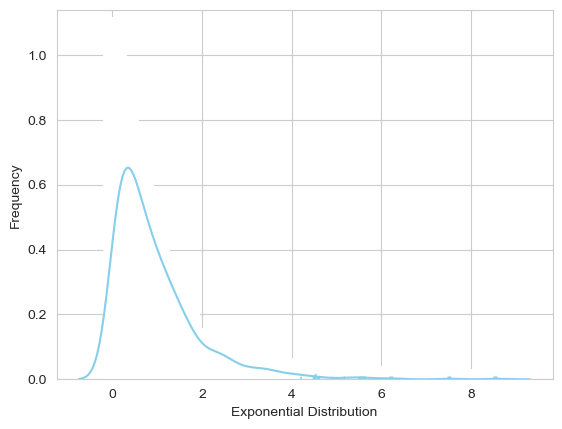

In [27]:
#Lambda distribution

from scipy.stats import expon

data_expon = expon.rvs(scale=1,loc=0,size=1000)
ax = sns.distplot(data_expon, kde=True, bins=100, color='skyblue', hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Exponential Distribution', ylabel='Frequency')


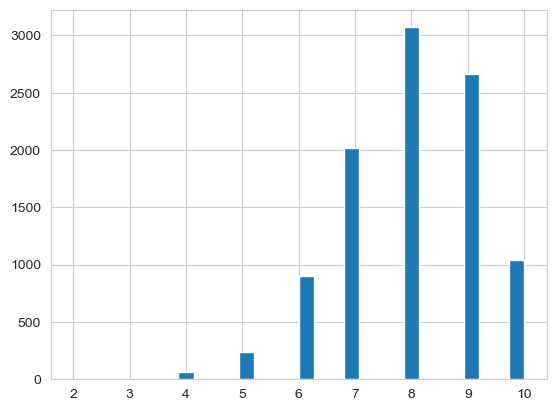

In [28]:
#Binomial distribution

from scipy.stats import binom

data_binom = binom.rvs(n=10,p=0.8,size=10000)
plt.hist(data_binom, bins=30)
plt.show()


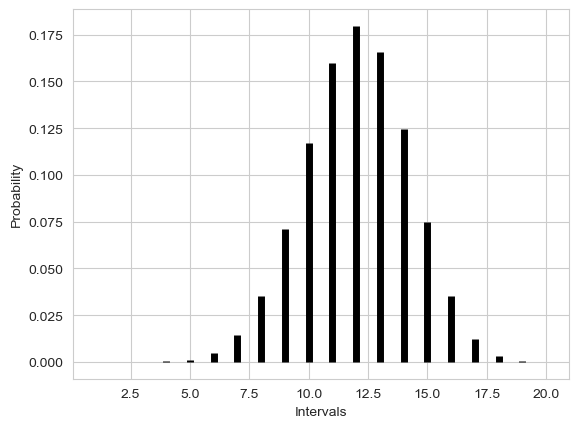

In [26]:
# Importing required libraries
from scipy.stats import binom
import numpy as np

# Defining the parameters for the binomial distribution
n = 20  # Number of trials
p = 0.6  # Probability of success

# Generating binomial distribution
x = np.arange(1,21)
pmf = binom.pmf(x, n, p)

# Plotting the results
sns.set_style('whitegrid')
plt.vlines(x ,0, pmf, colors='k', linestyles='-', lw=5)
plt.ylabel('Probability')
plt.xlabel('Intervals')
plt.show()


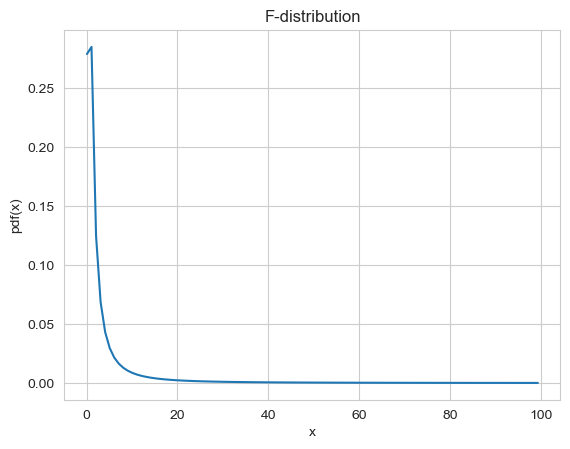

In [29]:
from scipy.stats import f
import numpy as np

dfn, dfd = 5, 2  # degrees of freedom numerator and denominator
rv = f(dfn, dfd)  # F-distribution

x = np.linspace(f.ppf(0.01, dfn, dfd), f.ppf(0.99, dfn, dfd), 100)
y = rv.pdf(x)  # probability density function

# plot
import matplotlib.pyplot as plt
plt.plot(x, y)
plt.title('F-distribution')
plt.xlabel('x')
plt.ylabel('pdf(x)')
plt.show()


# Studying Labor Market Dynamics

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import shapiro, pearsonr, ttest_ind, mannwhitneyu


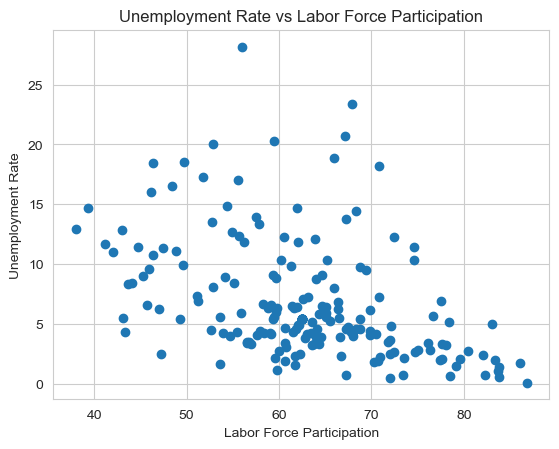

In [31]:
plt.scatter(df['Population: Labor force participation (%)'], df['Unemployment rate'])
plt.xlabel('Labor Force Participation')
plt.ylabel('Unemployment Rate')
plt.title('Unemployment Rate vs Labor Force Participation')
plt.show()

In [32]:
correlation = df['Unemployment rate'].corr(df['Population: Labor force participation (%)'])
print('Correlation:', correlation)

Correlation: -0.4314138165200798


In [18]:
# Assuming your DataFrame 'df' is already loaded with the data
#https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/

In [33]:
# Normality Test for 'Unemployment rate'
stat, p = shapiro(df['Unemployment rate'])

print('Unemployment rate:', 'Statistics=%.2f, p=%.2f' % (stat, p))

if p > 0.05:
    print('Sample looks Gaussian')
else:
    print('Sample does not look Gaussian')


Unemployment rate: Statistics=0.87, p=0.00
Sample does not look Gaussian


In [34]:
# Normality Test for 'Labor force participation'
stat, p = shapiro(df['Population: Labor force participation (%)'])

print('Unemployment rate:', 'Statistics=%.2f, p=%.2f' % (stat, p))

if p > 0.05:
    print('Sample looks Gaussian')
else:
    print('Sample does not look Gaussian')


Unemployment rate: Statistics=0.98, p=0.03
Sample does not look Gaussian


In [35]:
stat, p = shapiro(df['Birth Rate'])

print('Birth rate:', 'Statistics=%.2f, p=%.2f' % (stat, p))

if p > 0.05:
    print('Sample looks Gaussian')
else:
    print('Sample does not look Gaussian')

Birth rate: Statistics=nan, p=1.00
Sample looks Gaussian


In [45]:
stat, p = ttest_ind(df['Unemployment rate'], df['Population: Labor force participation (%)'])
print('Statistics=%.2f, p=%.2f' % (stat, p))

if p > 0.05:
    print('Samples are likely drawn from the same distributions (fail to reject H0)')
else:
    print('Samples are likely drawn from different distributions (reject H0)')


Statistics=-70.48, p=0.00
Samples are likely drawn from different distributions (reject H0)


In [46]:
stat, p = mannwhitneyu(df['Unemployment rate'], df['Population: Labor force participation (%)'])
print('Statistics=%.2f, p=%.2f' % (stat, p))

if p > 0.05:
    print('Samples are likely drawn from the same distributions (fail to reject H0)')
else:
    print('Samples are likely drawn from different distributions (reject H0)')


Statistics=0.00, p=0.00
Samples are likely drawn from different distributions (reject H0)


In [48]:
from scipy import stats
from statsmodels.formula.api import ols
#import statsmodels.api as sm

# One-sample t-test
t_statistic, p_value = stats.ttest_1samp(df['Unemployment rate'], 0.0)
print('t-statistic:', t_statistic)
print('p-value:', p_value)


t-statistic: 19.417670076487422
p-value: 2.32361093809253e-47


In [22]:
df.columns

Index(['Country', 'Density\n(P/Km2)', 'Abbreviation', 'Agricultural Land( %)',
       'Land Area(Km2)', 'Armed Forces size', 'Birth Rate',
       'Capital/Major City', 'Co2-Emissions', 'CPI', 'CPI Change (%)',
       'Currency-Code', 'Fertility Rate', 'Forested Area (%)',
       'Gasoline Price', 'GDP', 'Gross primary education enrollment (%)',
       'Gross tertiary education enrollment (%)', 'Infant mortality',
       'Largest city', 'Life expectancy', 'Maternal mortality ratio',
       'Minimum wage', 'Official language', 'Out of pocket health expenditure',
       'Physicians per thousand', 'Population',
       'Population: Labor force participation (%)', 'Tax revenue (%)',
       'Total tax rate', 'Unemployment rate', 'Urban_population'],
      dtype='object')

In [56]:
# Chi-square test
chi2, p_val, dof, ex = stats.chi2_contingency(pd.crosstab(df['Population: Labor force participation (%)'], df['Unemployment rate']))
print('Chi-square statistic:', chi2)
print('p-value:', p_val)

Chi-square statistic: 23632.888888888883
p-value: 0.2284524803421738


In [80]:
# Regression analysis
import statsmodels.api as sm
X = sm.add_constant(df['Population: Labor force participation (%)']) # adding a constant
model = sm.OLS(df['Unemployment rate'], X).fit()
print_model = model.summary()
print(print_model)


                            OLS Regression Results                            
Dep. Variable:      Unemployment rate   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.182
Method:                 Least Squares   F-statistic:                     44.14
Date:                Wed, 10 Jan 2024   Prob (F-statistic):           3.05e-10
Time:                        21:04:00   Log-Likelihood:                -563.83
No. Observations:                 195   AIC:                             1132.
Df Residuals:                     193   BIC:                             1138.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

In [89]:
result =statsmodels.tsa.stattools.adfuller(df['Population: Labor force participation (%)'])

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])


NameError: name 'statsmodels' is not defined

In [57]:
df = pd.DataFrame({
    'group': ['A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B'],
    'score': [371, 542, 275, 389, 2145, 1459, 153, 874, 321, 525]
})

In [58]:
group_A = df[df['group'] == 'A']['score']
group_B = df[df['group'] == 'B']['score']


In [59]:
t_statistic, p_value = ttest_ind(group_A, group_B)
print('t-statistic:', t_statistic)
print('p-value:', p_value)


t-statistic: 0.18480230929708708
p-value: 0.8579830736566254


In [60]:
df.head()

group  score
0     A    371
1     A    542
2     A    275
3     A    389
4     A   2145

In [61]:
# ANOVA
df = pd.DataFrame({
    'group': ['A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B'],
    'score': [371, 542, 275, 389, 2145, 1459, 153, 874, 321, 525]
})
group_A = df[df['group'] == 'A']['score']
group_B = df[df['group'] == 'B']['score']

fvalue, pvalue = stats.f_oneway(group_A , group_B)
print(fvalue, pvalue)


0.03415189352153622 0.8579830736566272


In [88]:
!python -m pip install statsmodels

In [64]:
!pip install --upgrade scipy statsmodels

     ---------------------------------------- 44.1/44.1 MB 3.1 MB/s eta 0:00:00
     ---------------------------------------- 9.8/9.8 MB 3.8 MB/s eta 0:00:00
     -------------------------------------- 233.9/233.9 kB 7.2 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.9.3
    Uninstalling scipy-1.9.3:
      Successfully uninstalled scipy-1.9.3


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\1508\\AppData\\Local\\anaconda30\\Lib\\site-packages\\~~ipy\\signal\\_max_len_seq_inner.cp310-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [90]:
!pip list

Package                       Version
----------------------------- ---------------
absl-py                       2.0.0
accelerate                    0.23.0
aiofiles                      23.2.1
aiohttp                       3.8.5
aiosignal                     1.3.1
alabaster                     0.7.12
alembic                       1.8.1
altair                        5.1.2
anaconda-anon-usage           0.4.3
anaconda-client               1.11.2
anaconda-cloud-auth           0.1.4
anaconda-navigator            2.5.1
anaconda-project              0.11.1
analytics-python              1.4.post1
annotated-types               0.5.0
ansi2html                     1.8.0
anyio                         3.7.1
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astor                         0.8.1
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
astunp